In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path= ('/content/drive/MyDrive/Colab Notebooks/CSE5317-DataMining-HW/new_df_GSE25724.csv')
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21225 entries, 0 to 21224
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gene Symbol  21225 non-null  object 
 1   GSM631755    21225 non-null  float64
 2   GSM631756    21225 non-null  float64
 3   GSM631757    21225 non-null  float64
 4   GSM631758    21225 non-null  float64
 5   GSM631759    21225 non-null  float64
 6   GSM631760    21225 non-null  float64
 7   GSM631761    21225 non-null  float64
 8   GSM631762    21225 non-null  float64
 9   GSM631763    21225 non-null  float64
 10  GSM631764    21225 non-null  float64
 11  GSM631765    21225 non-null  float64
 12  GSM631766    21225 non-null  float64
 13  GSM631767    21225 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.3+ MB


In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Elbow Method to Determine Optimal Clusters

In [ ]:
from sklearn.cluster import KMeans

diabetic_samples = ['GSM631762', 'GSM631763', 'GSM631764', 'GSM631765', 'GSM631766', 'GSM631767']
non_diabetic_samples = ['GSM631755', 'GSM631756', 'GSM631757', 'GSM631758', 'GSM631759', 'GSM631760','GSM631761']

selected_samples = diabetic_samples + non_diabetic_samples
data_selected_samples = data[selected_samples].transpose()

In [ ]:
import numpy as np

data_selected_samples = np.log2(data_selected_samples + 1)

data_selected_samples.head()

,0,1,2,3,4,5,6,7,8,9,...,21215,21216,21217,21218,21219,21220,21221,21222,21223,21224
GSM631762,3.279771,2.423229,2.648385,3.081844,2.128693,2.856205,2.620657,2.325533,2.265170,2.081162,...,3.671135,2.878390,3.249309,3.632803,3.086892,3.400020,3.105921,1.999304,2.787698,2.185251
GSM631763,3.305650,2.414255,2.709500,3.173052,2.198224,2.928061,2.674449,2.353315,2.319381,2.077660,...,3.632594,2.920636,3.201366,3.565061,2.920032,3.298405,3.131534,2.108247,2.821378,2.286609
GSM631764,3.380703,2.414671,2.878543,3.255274,2.202502,3.054777,2.679397,2.349331,2.298459,2.179193,...,3.606940,2.844470,3.142606,3.528446,2.906542,3.278814,2.944315,2.035842,2.831987,2.222261
GSM631765,3.301711,2.371662,2.727317,3.307392,2.273665,2.964657,2.738472,2.420970,2.441858,2.195477,...,3.660678,3.060705,3.298515,3.528721,2.988365,3.283073,3.075577,2.049390,2.844347,2.281238
GSM631766,3.483300,2.431179,2.660107,3.208548,2.201900,3.011739,2.646992,2.308722,2.198947,2.103491,...,3.739621,2.938090,3.314888,3.696072,3.271529,3.544139,3.053037,2.076306,2.812165,2.226598


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

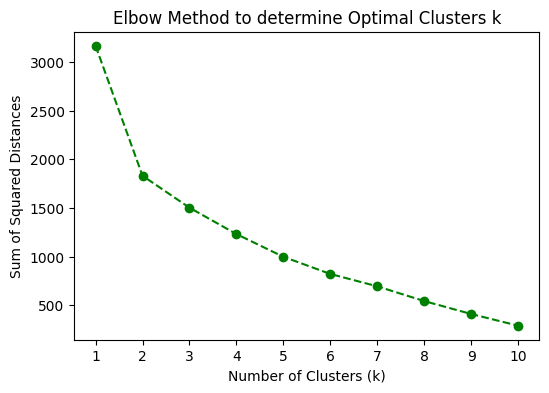

In [ ]:
import matplotlib.pyplot as plt

k_values = range(1, 11)

ssd = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_selected_samples)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, ssd, marker='o', linestyle='--', color = 'green')
plt.title('Elbow Method to determine Optimal Clusters k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.xticks(k_values)
#plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_selected_samples)

data_selected_samples['Cluster'] = clusters

data_selected_samples['Cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GSM631762    0
GSM631763    1
GSM631764    1
GSM631765    1
GSM631766    0
GSM631767    1
GSM631755    0
GSM631756    0
GSM631757    0
GSM631758    1
GSM631759    0
GSM631760    0
GSM631761    0
Name: Cluster, dtype: int32

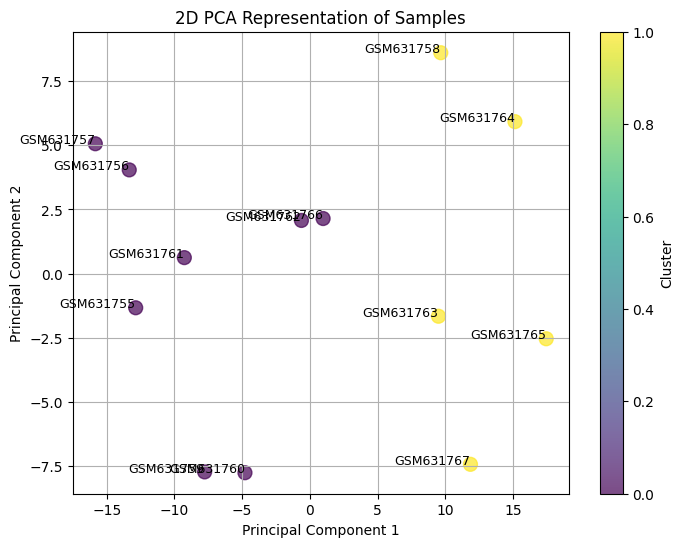

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

pca_result_samples = pca.fit_transform(data_selected_samples.drop('Cluster', axis=1))

pca_samples_df = pd.DataFrame(data={'x': pca_result_samples[:,0], 'y': pca_result_samples[:,1], 'Cluster': clusters, 'Sample': data_selected_samples.index})

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x=pca_samples_df['x'], y=pca_samples_df['y'], c=pca_samples_df['Cluster'], cmap='viridis', s=100, alpha=0.7)

for i, row in pca_samples_df.iterrows():
    plt.text(row['x'], row['y'], s=row['Sample'], fontsize=9, ha='right')

plt.title('2D PCA Representation of Samples')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [ ]:

centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=data_selected_samples.drop('Cluster', axis=1).columns)

centroids_df

,0,1,2,3,4,5,6,7,8,9,...,21215,21216,21217,21218,21219,21220,21221,21222,21223,21224
0,3.364688,2.487563,2.672734,3.116822,2.112293,2.824429,2.566147,2.282418,2.195947,2.052086,...,3.700084,3.132265,3.433321,3.686713,3.374807,3.584653,3.197708,2.028530,2.797236,2.316384
1,3.313794,2.427742,2.767186,3.218000,2.217426,2.974731,2.684882,2.354422,2.388347,2.191310,...,3.630554,2.954454,3.224925,3.539995,2.997951,3.317329,3.056248,2.088026,2.823064,2.274026


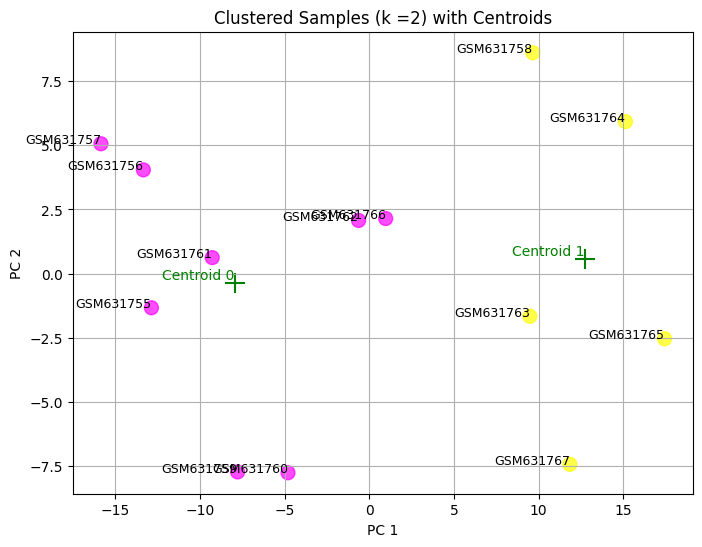

In [ ]:

centroids_2d = pca.transform(centroids)

#PCA representation of samples
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x=pca_samples_df['x'], y=pca_samples_df['y'], c=pca_samples_df['Cluster'], cmap='spring', s=100, alpha=0.7)

plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], c='green', s=200, marker='+')

for i, row in pca_samples_df.iterrows():
    plt.text(row['x'], row['y'], s=row['Sample'], fontsize=9, ha='right')

for i, centroid in enumerate(centroids_2d):
    plt.text(centroid[0], centroid[1], s=f'Centroid {i}', fontsize=10, ha='right', va='bottom', color='green')

plt.title('Clustered Samples (k =2) with Centroids')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

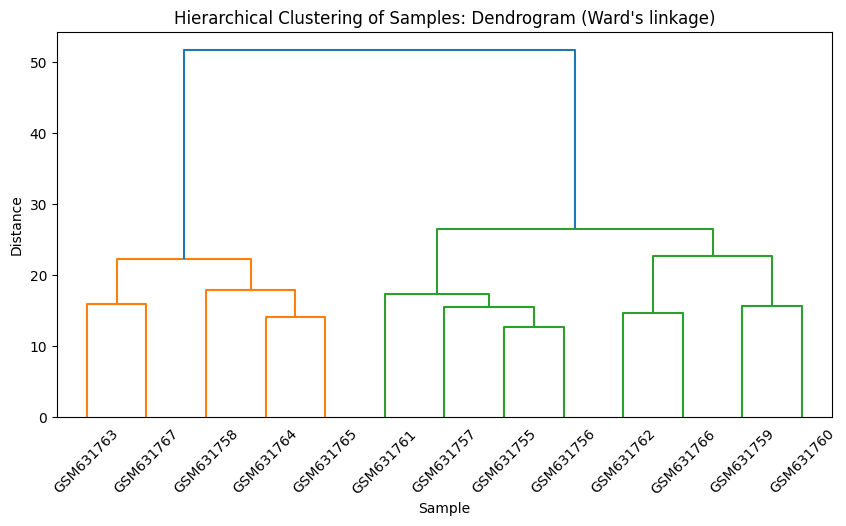

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data_selected_samples.drop('Cluster', axis=1), method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=data_selected_samples.index, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering of Samples: Dendrogram (Ward\'s linkage)')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

#DGE

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

gene_data_transposed = data_selected_samples.drop('Cluster', axis=1).transpose()

diabetic_data = data_selected_samples.drop('Cluster', axis=1).transpose()[diabetic_samples]
non_diabetic_data = data_selected_samples.drop('Cluster', axis=1).transpose()[non_diabetic_samples]
p_value_threshold = 0.0001
p_values = ttest_ind(diabetic_data, non_diabetic_data, axis=1).pvalue
dge_genes = gene_data_transposed.index[p_values < p_value_threshold]
num_dge_genes = len(dge_genes)
num_dge_genes, dge_genes[:10]

(81,
 Index([124, 410, 622, 672, 1180, 1419, 1448, 1488, 1692, 1701], dtype='object'))

In [ ]:

dge_df = pd.DataFrame({
    'Gene': gene_data_transposed.index,
    'P_Value': p_values
})
dge_df = dge_df[dge_df['Gene'].isin(dge_genes)]
top_50_dge_df = dge_df.sort_values(by='P_Value').head(50)
top_50_dge_genes = top_50_dge_df['Gene'].values
top_50_dge_df.head()

,Gene,P_Value
672,672,0.000002
17258,17258,0.000002
10751,10751,0.000002
15742,15742,0.000005
124,124,0.000005


In [ ]:

gene_id_to_symbol_mapping = data.set_index('Gene Symbol').iloc[top_50_dge_df.index].index

top_50_dge_symbols_df = pd.DataFrame({
    'Gene Symbol': gene_id_to_symbol_mapping,
    'P-Value': top_50_dge_df.set_index('Gene').loc[top_50_dge_genes, 'P_Value'].values
})

top_50_dge_symbols_df.head()

,Gene Symbol,P-Value
0,HAX1,0.000002
1,SYBU,0.000002
2,FUT6,0.000002
3,HMGB1P12 /// HMGB1P12,0.000005
4,EIF3A,0.000005


In [ ]:

top_50_gene_symbols = top_50_dge_symbols_df['Gene Symbol'].dropna().unique()

top_50_genes_data = data[data['Gene Symbol'].isin(top_50_gene_symbols)]

top_50_genes_data.head()
top_50_genes_data.to_csv('/content/drive/MyDrive/Colab Notebooks/CSE5317-DataMining-HW/top_50_DEG_genes_data.csv', index=False)

In [ ]:
top_50_genes_data['Gene Symbol'] = top_50_genes_data['Gene Symbol'].str.replace(r'///.*', '')

<ipython-input-16-30577d3a2768>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  top_50_genes_data['Gene Symbol'] = top_50_genes_data['Gene Symbol'].str.replace(r'///.*', '')
<ipython-input-16-30577d3a2768>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_genes_data['Gene Symbol'] = top_50_genes_data['Gene Symbol'].str.replace(r'///.*', '')


In [ ]:

top_50_genes_data_avg = top_50_genes_data.groupby('Gene Symbol').mean()
top_50_genes_data_transposed = top_50_genes_data_avg.transpose()
top_50_genes_data_transposed.head()

Gene Symbol,11-Sep,AASDHPPT,ANKHD1,APBA2,APEX1,ATXN2L,BCL2L2,C7orf43,CDC40,CYP2A6,...,STK24,STOML2,SYBU,SYN3,TCEA1,TGM2,TMC6,TOP3A,UPF3A,UQCRC2
GSM631755,4.660283,6.722230,7.102687,5.395585,10.41060,4.453210,7.79887,5.87553,5.499050,5.090338,...,7.613897,8.14197,7.90020,4.40166,9.44960,6.750580,5.653220,4.700587,6.390243,8.737595
GSM631756,4.618307,6.902470,7.511737,5.858625,9.52260,4.726345,7.61345,5.80268,5.675725,5.221077,...,7.188377,7.44704,8.43601,4.51393,9.09768,6.401312,5.673570,4.754877,6.155678,8.291275
GSM631757,4.704020,7.256645,7.319430,5.155400,9.40336,4.528030,8.08621,6.03741,5.671630,5.204370,...,7.387103,7.65658,8.47439,4.38656,9.78386,5.933232,5.582280,4.814907,6.738622,8.181815
GSM631758,4.380373,5.798805,6.826170,6.043145,9.20730,4.934400,6.97273,6.24768,4.934035,5.723490,...,6.884493,6.90108,7.61503,4.82206,8.30887,6.075795,5.920645,5.041643,5.337732,7.453120
GSM631759,4.332420,6.762280,7.285333,5.494595,9.78327,4.498165,7.49015,5.97929,5.582225,5.379817,...,7.374307,7.41113,8.04980,4.54187,9.57922,6.368453,5.982925,4.779080,6.109890,8.014425


In [ ]:
top_50_genes_data_avg.columns = top_50_genes_data_avg.columns.str.replace(r'///.*', '')

<ipython-input-33-a9dbb7cb699a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  top_50_genes_data_avg.columns = top_50_genes_data_avg.columns.str.replace(r'///.*', '')


In [ ]:
top_50_genes_data_transposed.head()

Gene Symbol,11-Sep,AASDHPPT,ANKHD1,APBA2,APEX1,ATXN2L,BCL2L2,C7orf43,CDC40,CYP2A6,...,STK24,STOML2,SYBU,SYN3,TCEA1,TGM2,TMC6,TOP3A,UPF3A,UQCRC2
GSM631755,4.660283,6.722230,7.102687,5.395585,10.41060,4.453210,7.79887,5.87553,5.499050,5.090338,...,7.613897,8.14197,7.90020,4.40166,9.44960,6.750580,5.653220,4.700587,6.390243,8.737595
GSM631756,4.618307,6.902470,7.511737,5.858625,9.52260,4.726345,7.61345,5.80268,5.675725,5.221077,...,7.188377,7.44704,8.43601,4.51393,9.09768,6.401312,5.673570,4.754877,6.155678,8.291275
GSM631757,4.704020,7.256645,7.319430,5.155400,9.40336,4.528030,8.08621,6.03741,5.671630,5.204370,...,7.387103,7.65658,8.47439,4.38656,9.78386,5.933232,5.582280,4.814907,6.738622,8.181815
GSM631758,4.380373,5.798805,6.826170,6.043145,9.20730,4.934400,6.97273,6.24768,4.934035,5.723490,...,6.884493,6.90108,7.61503,4.82206,8.30887,6.075795,5.920645,5.041643,5.337732,7.453120
GSM631759,4.332420,6.762280,7.285333,5.494595,9.78327,4.498165,7.49015,5.97929,5.582225,5.379817,...,7.374307,7.41113,8.04980,4.54187,9.57922,6.368453,5.982925,4.779080,6.109890,8.014425


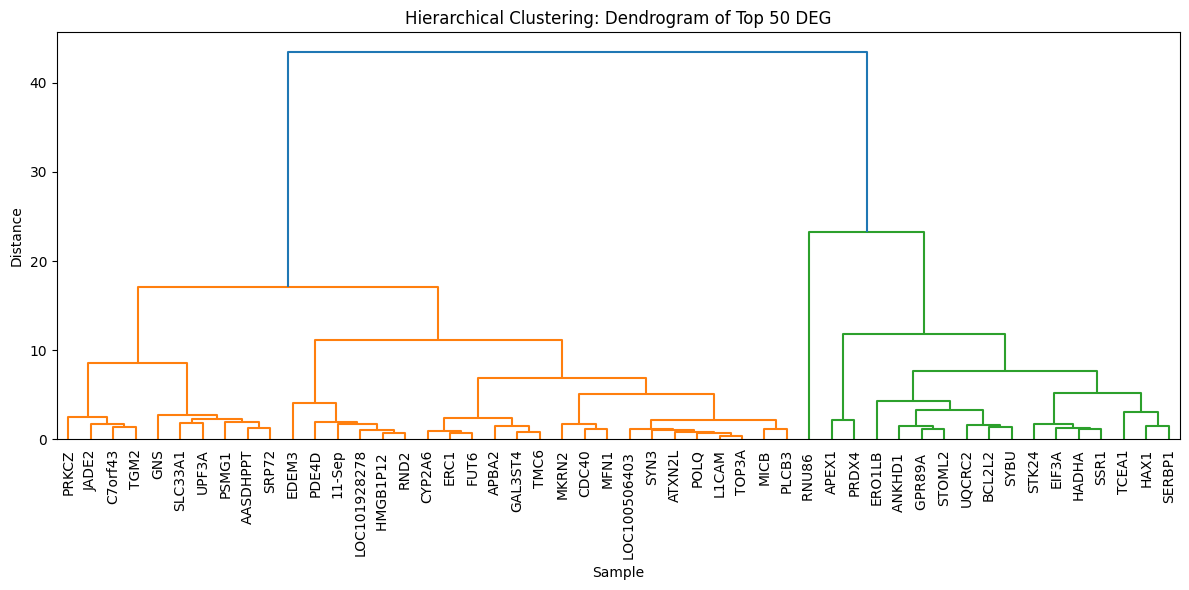

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(top_50_genes_data_avg, method='ward', metric='euclidean')
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=top_50_genes_data_avg.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering: Dendrogram of Top 50 DEG')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()